Some typical NumPy 'random' functions:

In [ ]:
import numpy as np

# To generate a random float values between 0 and 1 (exclusive)
print(np.random.rand(3, 2)) # Creates a 3 x 2 matrix of random float values between 0 and 1 (exclusive)

# To generate random float values from standard normal distribution (mean = 0 and std = 1)
print(np.random.randn(5)) # Generates 5 random float values from standard normal distribution

# To generate random integer values within a range of values
print(np.random.randint(1, 100, 10)) # Generates 10 random integer values between 1 and 100 (exclusive)

# To randomly select an element from a given list of elements
print(np.random.choice([1, 2, 3, 4, 5, 6, 7, 8, 9], size=3)) # Three random numbers from the given array will be chosen

# To generate a random sample of values from a normally distributed with a specified mean and standard deviation
print(np.random.normal(loc=0, scale=1, size=10)) # 10 random values will be generated from a normally distributed data where 0 (loc) is the mean and 1 (scale) is the standard deviation

# To set a seed for a random number generation to ensure you get the same results later as well
print(np.random.seed(42)) # This ensures that any random numbers generated in the program are same every time you run the program. The seed value '42' can be any other value

AIM #1: Generate a very large dataset
1. Generate a dataset of 1 million random data items between 1 and 100 items using only pandas
2. Generate a dataset of 1 million random data items between 1 and 100 using only NumPy
3. Calculate the time it takes for both the above operations. 
    3.1. Import the 'time' module, and use the time() function to calculate current time
    3.2. Which one is faster and why?

In [1]:
import pandas as pd
import numpy as np
import time


start_time_pandas = time.time()
pandas_data = pd.DataFrame(np.random.randint(1, 101, size=(1000000, 1)), columns=['Random Number'])
end_time_pandas = time.time()


start_time_numpy = time.time()
numpy_data = np.random.randint(1, 101, size=1000000).reshape(-1, 1)
end_time_numpy = time.time()

pandas_time = end_time_pandas - start_time_pandas
numpy_time = end_time_numpy - start_time_numpy

print(f"Time taken by Pandas: {pandas_time} seconds")
print(f"Time taken by NumPy: {numpy_time} seconds")

if pandas_time < numpy_time:
    print("Pandas is faster.")
elif pandas_time > numpy_time:
    print("NumPy is faster.")
else:
    print("Both Pandas and NumPy took the same amount of time.")

Time taken by Pandas: 0.006505012512207031 seconds
Time taken by NumPy: 0.00600123405456543 seconds
NumPy is faster.


AIM #2: Basic statistics
For the given dataset on sleep health and lifestyle, do the following
1. Using only pandas, load the dataset, calculate mean 'Sleep Duration', 'Systolic Blood Pressure', 'Diastolic Blood Pressure', 'Heart Rate' and 'Daily Steps'.
2. Do the same as in Step 1 using only NumPy
3. Using only pandas, first calculate correlation (across only the numerical variables), and then separate correlation between...
    Sleep duration and Age
    Sleep duration and Heart rate
    Sleep duration and Daily steps
4. Using only NumPy, do the same as Step 3
5. Using pandas only, calculate standard deviation for 'Sleep Duration'. 
6. Usiong NumPy only, calculate standard deviation for 'Sleep Duration'. 
7. Calculate the time difference between using pandas and NumPy, right from the step of loading the dataset to the final standard deviation step. 
    5.1. Which one is faster and why?

In [21]:
import pandas as pd
import numpy as np
import time


start_time_pandas = time.time()
data = pd.read_csv("sleep_health.csv")


mean_values = data[['Sleep Duration', 'Systolic blood pressure', 'Diastolic blood pressure', 'Heart Rate', 'Daily Steps']].mean()
print("Mean values using pandas:")
print(mean_values)


correlation_matrix = data.corr()
correlation_sleep_age = data['Sleep Duration'].corr(data['Age'])
correlation_sleep_heart_rate = data['Sleep Duration'].corr(data['Heart Rate'])
correlation_sleep_daily_steps = data['Sleep Duration'].corr(data['Daily Steps'])

print("\nCorrelation Matrix:")
print(correlation_matrix)
print("\nCorrelation between Sleep duration and Age:", correlation_sleep_age)
print("Correlation between Sleep duration and Heart rate:", correlation_sleep_heart_rate)
print("Correlation between Sleep duration and Daily steps:", correlation_sleep_daily_steps)

std_sleep_duration = data['Sleep Duration'].std()
print("\nStandard Deviation for Sleep Duration (Pandas):", std_sleep_duration)

end_time_pandas = time.time()
time_taken_pandas = end_time_pandas - start_time_pandas


start_time_numpy = time.time()
data_np = np.genfromtxt("sleep_health.csv", delimiter=",", skip_header=1, usecols=(4, 9, 10, 11, 12))


mean_values_np = np.mean(data_np, axis=0)
print("\nMean values using NumPy:")
print(mean_values_np)


correlation_matrix_np = np.corrcoef(data_np, rowvar=False)
correlation_sleep_age_np = np.corrcoef(data_np[:, 0], data_np[:, 2])[0, 1]
correlation_sleep_heart_rate_np = np.corrcoef(data_np[:, 0], data_np[:, 3])[0, 1]
correlation_sleep_daily_steps_np = np.corrcoef(data_np[:, 0], data_np[:, 4])[0, 1]

print("\nCorrelation Matrix (NumPy):")
print(correlation_matrix_np)
print("\nCorrelation between Sleep duration and Age:", correlation_sleep_age_np)
print("Correlation between Sleep duration and Heart rate:", correlation_sleep_heart_rate_np)
print("Correlation between Sleep duration and Daily steps:", correlation_sleep_daily_steps_np)


std_sleep_duration_np = np.std(data_np[:, 0])
print("\nStandard Deviation for Sleep Duration (NumPy):", std_sleep_duration_np)

end_time_numpy = time.time()
time_taken_numpy = end_time_numpy - start_time_numpy

print("\nTime taken using pandas:", time_taken_pandas)
print("Time taken using NumPy:", time_taken_numpy)

Mean values using pandas:
Sleep Duration                 7.132086
Systolic blood pressure      128.553476
Diastolic blood pressure      84.649733
Heart Rate                    70.165775
Daily Steps                 6816.844920
dtype: float64

Correlation Matrix:
                          Person ID       Age  Sleep Duration  \
Person ID                  1.000000  0.990516        0.296305   
Age                        0.990516  1.000000        0.344709   
Sleep Duration             0.296305  0.344709        1.000000   
Quality of Sleep           0.431612  0.473734        0.883213   
Physical Activity Level    0.149882  0.178993        0.212360   
Stress Level              -0.394287 -0.422344       -0.811023   
Systolic blood pressure    0.611551  0.605878       -0.180406   
Diastolic blood pressure   0.590670  0.593839       -0.166570   
Heart Rate                -0.225467 -0.225606       -0.516455   
Daily Steps                0.043844  0.057973       -0.039533   

                      

AIM #3: Use suitable plots to visualize the data

1. Using only pandas (and matplotlib/seaborn if necessary) plot the distribution for
    1.1. Age
    1.2. Sleep Duration
    1.3. Quality of Sleep
    1.4. Physical Activity Level
    1.5. Stress Level
    1.6. Heart Rate
2. Using only NumPy, do the same as Step 1. You will need matplotlib for this
3. Using only pandas, use the appropriate plot to
    3.1. See the distribution of 'Sleep Duration' based on 'Quality of Sleep'
    3.2. See the distribution of 'Sleep Duration' based on 'Stress Level'
    3.3. See the distribution of 'Sleep Duration' based on 'Physical Activity Level'
    3.4. See the distribution of 'Sleep Duration' based on 'Occupation'
    3.5. See the distribution of 'Sleep Duration' based on 'BMI'
4. Using only NumPy, do the same as Step 3. You will need matplotlib for this
5. Using only pandas, use a suitable plot to see the relation between
    5.1. Age and Sleep Duration
    5.2. Sleep Duration and Heart Rate
    5.3. Heart Rate and Daily Steps
    5.4. Sleep Duration and Daily Steps
6. Using only NumPy, do the same as Step 5. You will need matplotlib for this 
7. Find the time difference between plotting using only pandas, and plotting using NumPy

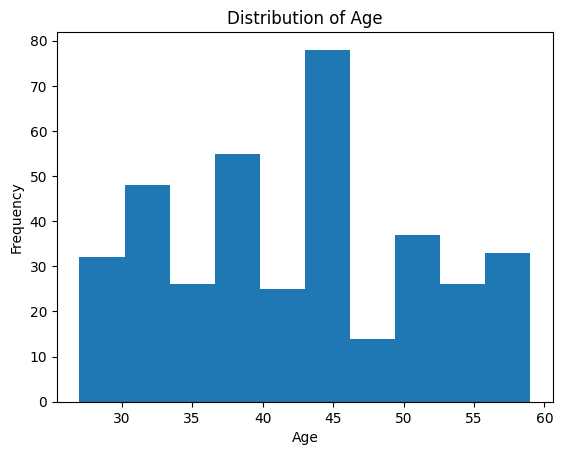

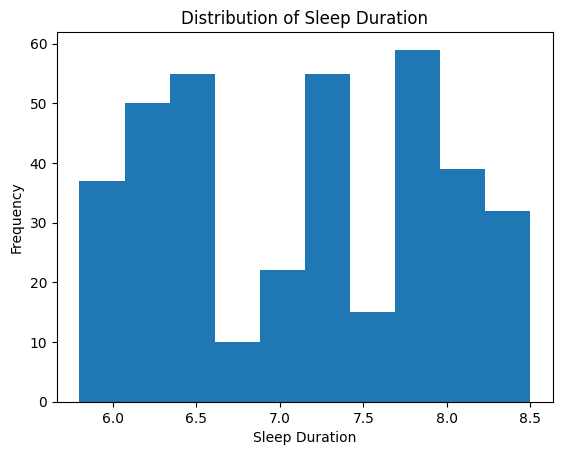

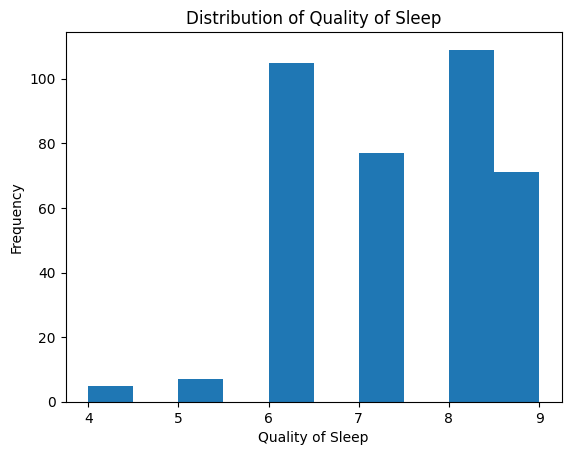

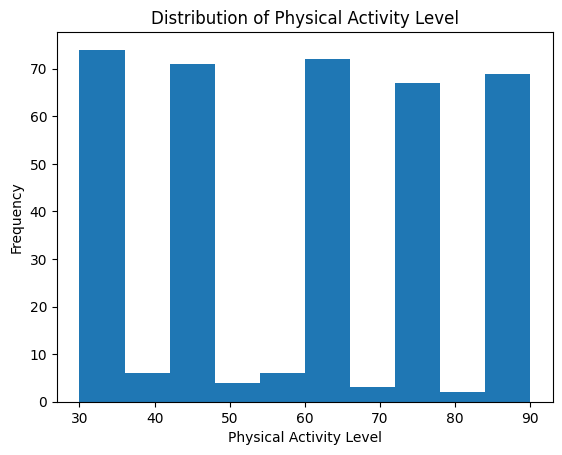

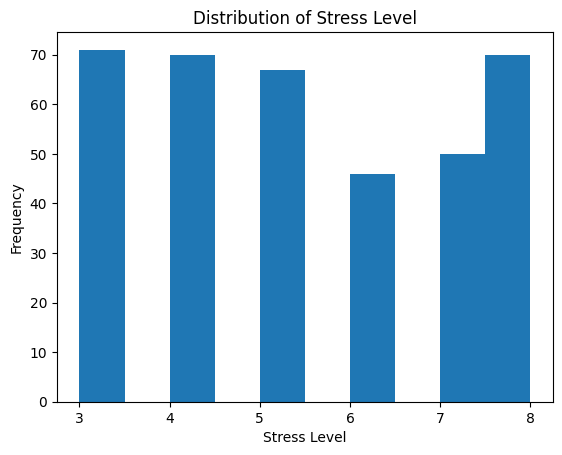

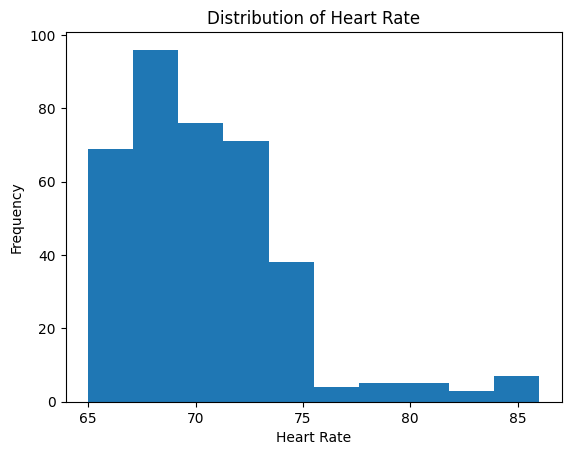

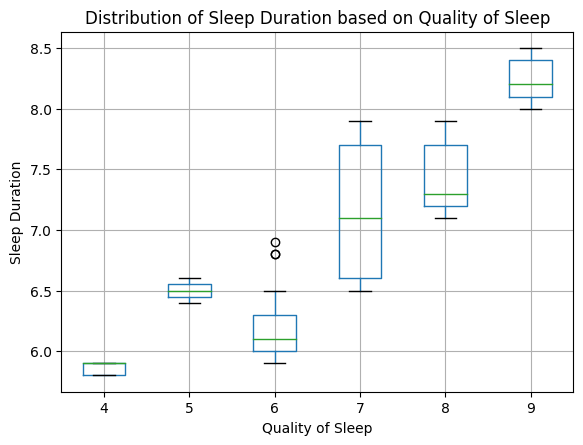

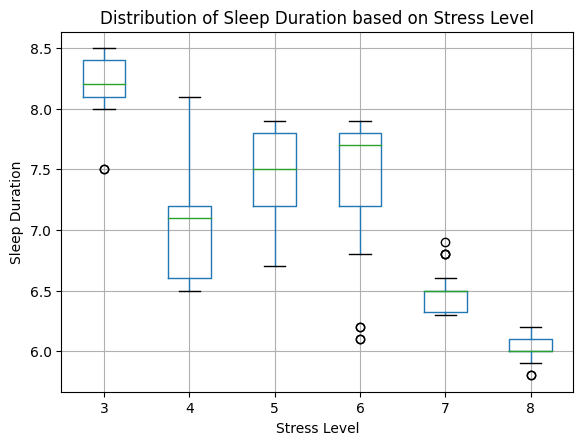

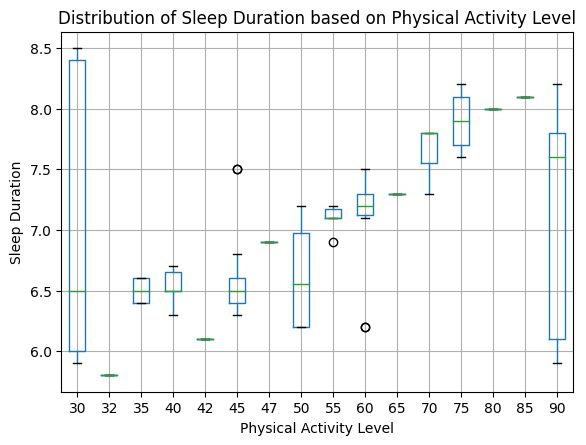

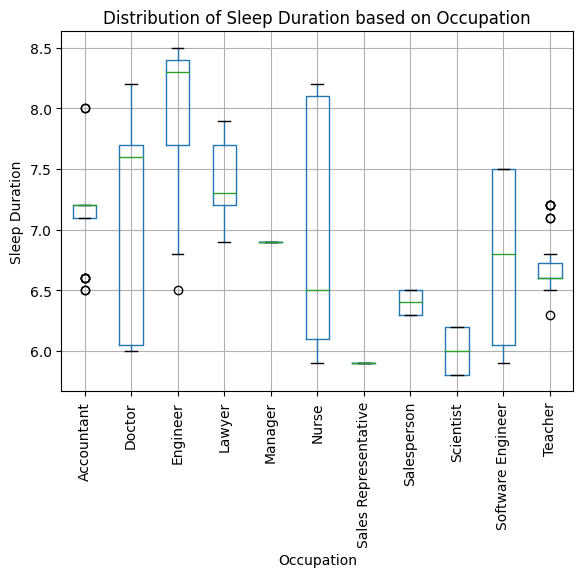

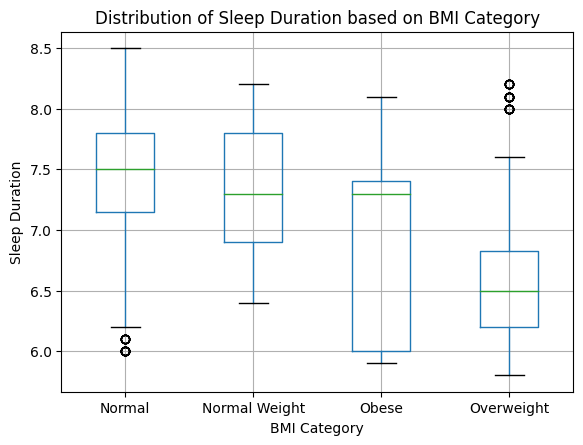

C:\Users\86151\AppData\Roaming\Python\Python38\site-packages\pandas\plotting\_matplotlib\core.py:1070: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


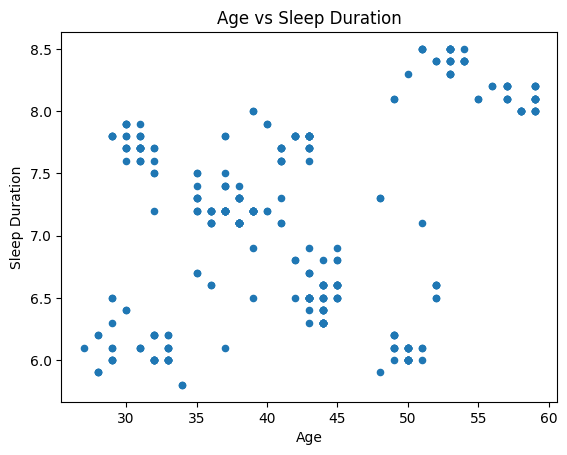

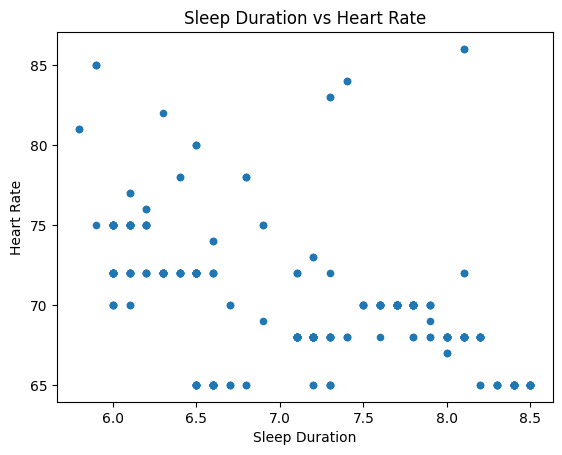

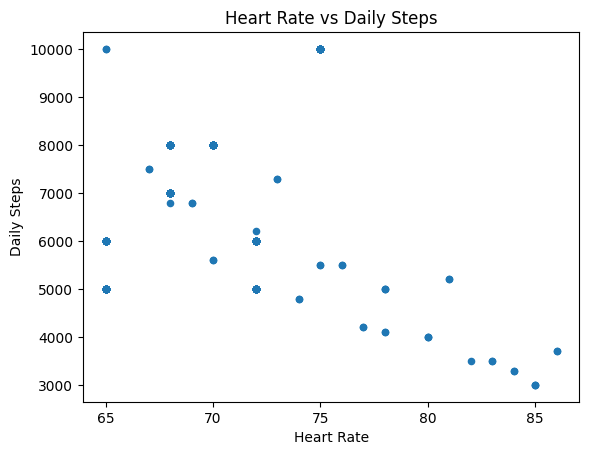

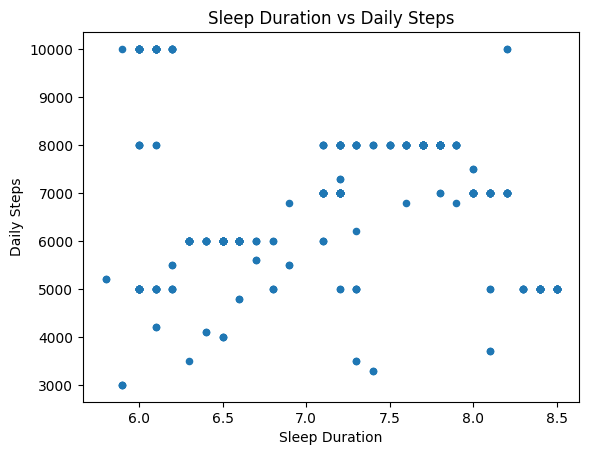

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


data = pd.read_csv('sleep_health.csv')



data['Age'].plot(kind='hist', title='Distribution of Age')
plt.xlabel('Age')
plt.show()


data['Sleep Duration'].plot(kind='hist', title='Distribution of Sleep Duration')
plt.xlabel('Sleep Duration')
plt.show()


data['Quality of Sleep'].plot(kind='hist', title='Distribution of Quality of Sleep')
plt.xlabel('Quality of Sleep')
plt.show()


data['Physical Activity Level'].plot(kind='hist', title='Distribution of Physical Activity Level')
plt.xlabel('Physical Activity Level')
plt.show()


data['Stress Level'].plot(kind='hist', title='Distribution of Stress Level')
plt.xlabel('Stress Level')
plt.show()


data['Heart Rate'].plot(kind='hist', title='Distribution of Heart Rate')
plt.xlabel('Heart Rate')
plt.show()


data.boxplot(column='Sleep Duration', by='Quality of Sleep')
plt.ylabel('Sleep Duration')
plt.title('Distribution of Sleep Duration based on Quality of Sleep')
plt.suptitle('')
plt.show()


data.boxplot(column='Sleep Duration', by='Stress Level')
plt.ylabel('Sleep Duration')
plt.title('Distribution of Sleep Duration based on Stress Level')
plt.suptitle('')
plt.show()


data.boxplot(column='Sleep Duration', by='Physical Activity Level')
plt.ylabel('Sleep Duration')
plt.title('Distribution of Sleep Duration based on Physical Activity Level')
plt.suptitle('')
plt.show()


data.boxplot(column='Sleep Duration', by='Occupation', rot=90)
plt.ylabel('Sleep Duration')
plt.title('Distribution of Sleep Duration based on Occupation')
plt.suptitle('')
plt.show()


data.boxplot(column='Sleep Duration', by='BMI Category')
plt.ylabel('Sleep Duration')
plt.title('Distribution of Sleep Duration based on BMI Category')
plt.suptitle('')
plt.show()


data.plot.scatter(x='Age', y='Sleep Duration', title='Age vs Sleep Duration')
plt.show()

data.plot.scatter(x='Sleep Duration', y='Heart Rate', title='Sleep Duration vs Heart Rate')
plt.show()


data.plot.scatter(x='Heart Rate', y='Daily Steps', title='Heart Rate vs Daily Steps')
plt.show()


data.plot.scatter(x='Sleep Duration', y='Daily Steps', title='Sleep Duration vs Daily Steps')
plt.show()


AIM #4: Other possible plotting

1. Think of other possible plots to show some interesting distribution and relations. Do this using both pandas and NumPy

